In [33]:

dataset = 'input_pilot_data.csv'
df = pd.read_csv(dataset)
df

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [34]:
df['Formation'], categories = pd.factorize(df['Formation'])
df['Well Name'], categories = pd.factorize(df['Well Name'])
df


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,0,0,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,0,0,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,0,0,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,0,0,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,0,0,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,13,9,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,13,9,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,13,9,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,13,9,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [12]:
dataset = 'filtered_data.csv'
df = pd.read_csv(dataset)

In [13]:
df.columns

Index(['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'RELPOS', 'Facies',
       'Depth', 'Formation', 'Well Name', 'Core_Porosity', 'Core_Perm',
       'Bulk_Dens', 'Pred_Perm'],
      dtype='object')

In [14]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

# facies_labels = ['facies_{}'.format(i) for i in range(1, len(df['Facies'].unique()) + 1)]

facies_color_map = {label: color for label, color in zip(facies_labels, facies_colors)}

df['FaciesLabels'] = df['Facies'].apply(lambda x: facies_labels[x - 1])


In [15]:
correct_facies_labels = df['Facies'].values
feature_vectors = df[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'RELPOS', 'Depth']]
# feature_vectors = df[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'RELPOS','Formation','Well Name']]

### Additional

In [7]:
from itertools import combinations

q=[]
features = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'RELPOS', 'Formation','Well Name']

# Generate combinations of indices
indices_combinations = []
for r in range(3, len(features) + 1):
    indices_combinations.extend(combinations(range(len(features)), r))

# Generate combinations of features using the indices
all_combinations = []
for indices_combo in indices_combinations:
    combo = [features[i] for i in indices_combo]
    all_combinations.append(combo)

# Print all combinations
for combo in all_combinations:
    print(combo)
    q.append(combo)

len(q)

['GR', 'ILD_log10', 'DeltaPHI']
['GR', 'ILD_log10', 'PHIND']
['GR', 'ILD_log10', 'RELPOS']
['GR', 'ILD_log10', 'Formation']
['GR', 'ILD_log10', 'Well Name']
['GR', 'DeltaPHI', 'PHIND']
['GR', 'DeltaPHI', 'RELPOS']
['GR', 'DeltaPHI', 'Formation']
['GR', 'DeltaPHI', 'Well Name']
['GR', 'PHIND', 'RELPOS']
['GR', 'PHIND', 'Formation']
['GR', 'PHIND', 'Well Name']
['GR', 'RELPOS', 'Formation']
['GR', 'RELPOS', 'Well Name']
['GR', 'Formation', 'Well Name']
['ILD_log10', 'DeltaPHI', 'PHIND']
['ILD_log10', 'DeltaPHI', 'RELPOS']
['ILD_log10', 'DeltaPHI', 'Formation']
['ILD_log10', 'DeltaPHI', 'Well Name']
['ILD_log10', 'PHIND', 'RELPOS']
['ILD_log10', 'PHIND', 'Formation']
['ILD_log10', 'PHIND', 'Well Name']
['ILD_log10', 'RELPOS', 'Formation']
['ILD_log10', 'RELPOS', 'Well Name']
['ILD_log10', 'Formation', 'Well Name']
['DeltaPHI', 'PHIND', 'RELPOS']
['DeltaPHI', 'PHIND', 'Formation']
['DeltaPHI', 'PHIND', 'Well Name']
['DeltaPHI', 'RELPOS', 'Formation']
['DeltaPHI', 'RELPOS', 'Well Name']
['D

99

In [8]:
from itertools import combinations
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score



features = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'RELPOS']

# Generate combinations of indices
indices_combinations = []
for r in range(3, len(features) + 1):
    indices_combinations.extend(combinations(range(len(features)), r))

# Generate combinations of features using the indices
all_combinations = []
for indices_combo in indices_combinations:
    combo = [features[i] for i in indices_combo]
    all_combinations.append(combo)

# Print all combinations
for combo in all_combinations:
    feature_vectors = df[combo]

    scaler = preprocessing.StandardScaler().fit(feature_vectors)
    scaled_features = scaler.transform(feature_vectors)

    X_train, X_test, y_train, y_test = train_test_split(
            scaled_features, correct_facies_labels, test_size=0.2, random_state=10)
    

    RFC_model = RandomForestClassifier(max_depth=12, n_estimators=20, max_features=6).fit(X_train, y_train)
    yhat_RFC = RFC_model.predict(X_test)


    NNC_model = MLPClassifier(alpha=0.001, max_iter=1000, learning_rate_init=0.001, 
                            solver='adam', batch_size=10, hidden_layer_sizes=200).fit(X_train, y_train)
    yhat_NNC = NNC_model.predict(X_test)


    DT_model = DecisionTreeClassifier(criterion="entropy", max_depth=25, min_samples_split=3)
    DT_model.fit(X_train, y_train)
    yhat_DT = DT_model.predict(X_test)


    f1RFC = f1_score(y_test, yhat_RFC, average='weighted')
    f1NNC =  f1_score(y_test, yhat_NNC, average='weighted')
    f1DT = f1_score(y_test, yhat_DT, average='weighted')

    print(combo,'!')
    print('RFC:', f1RFC)
    print('NNC:', f1NNC)
    print('DTC:', f1DT)
    print('--------------------')

c:\Users\Ritesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


['GR', 'ILD_log10', 'DeltaPHI'] !
RFC: 0.5398739334972713
NNC: 0.48944448541007
DTC: 0.4454904433810679
--------------------


In [ ]:
from itertools import combinations
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from tabulate import tabulate

features = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'RELPOS']
results = []

# Generate combinations of indices
indices_combinations = []
for r in range(3, len(features) + 1):
    indices_combinations.extend(combinations(range(len(features)), r))

# Generate combinations of features using the indices
all_combinations = []
for indices_combo in indices_combinations:
    combo = [features[i] for i in indices_combo]
    feature_vectors = df[combo]

    scaler = preprocessing.StandardScaler().fit(feature_vectors)
    scaled_features = scaler.transform(feature_vectors)

    X_train, X_test, y_train, y_test = train_test_split(
            scaled_features, correct_facies_labels, test_size=0.2, random_state=10)
    

    RFC_model = RandomForestClassifier(max_depth=12, n_estimators=20, max_features=6).fit(X_train, y_train)
    yhat_RFC = RFC_model.predict(X_test)


    NNC_model = MLPClassifier(alpha=0.001, max_iter=1000, learning_rate_init=0.001, 
                            solver='adam', batch_size=10, hidden_layer_sizes=200).fit(X_train, y_train)
    yhat_NNC = NNC_model.predict(X_test)


    DT_model = DecisionTreeClassifier(criterion="entropy", max_depth=25, min_samples_split=3)
    DT_model.fit(X_train, y_train)
    yhat_DT = DT_model.predict(X_test)


    f1RFC = f1_score(y_test, yhat_RFC, average='weighted')
    f1NNC =  f1_score(y_test, yhat_NNC, average='weighted')
    f1DT = f1_score(y_test, yhat_DT, average='weighted')

    results.append([combo, f1RFC, f1NNC, f1DT])

# Print table
print(tabulate(results, headers=['Features', 'RFC F1 Score', 'NNC F1 Score', 'DTC F1 Score']))


Features                                              RFC F1 Score    NNC F1 Score    DTC F1 Score
--------------------------------------------------  --------------  --------------  --------------
['GR', 'ILD_log10', 'DeltaPHI']                           0.520374        0.4838          0.444653
['GR', 'ILD_log10', 'PHIND']                              0.526893        0.526335        0.445106
['GR', 'ILD_log10', 'RELPOS']                             0.548283        0.494035        0.492894
['GR', 'DeltaPHI', 'PHIND']                               0.504132        0.478051        0.442896
['GR', 'DeltaPHI', 'RELPOS']                              0.483011        0.446986        0.413376
['GR', 'PHIND', 'RELPOS']                                 0.513342        0.497745        0.454339
['ILD_log10', 'DeltaPHI', 'PHIND']                        0.467533        0.461928        0.413611
['ILD_log10', 'DeltaPHI', 'RELPOS']                       0.471056        0.433328        0.405947
['ILD_log1

In [ ]:
df_results = pd.DataFrame(results, columns=['Features', 'RFC F1 Score', 'NNC F1 Score', 'DTC F1 Score'])
df_results

,Features,RFC F1 Score,NNC F1 Score,DTC F1 Score
0,"[GR, ILD_log10, DeltaPHI]",0.520374,0.483800,0.444653
1,"[GR, ILD_log10, PHIND]",0.526893,0.526335,0.445106
2,"[GR, ILD_log10, RELPOS]",0.548283,0.494035,0.492894
3,"[GR, DeltaPHI, PHIND]",0.504132,0.478051,0.442896
4,"[GR, DeltaPHI, RELPOS]",0.483011,0.446986,0.413376
5,"[GR, PHIND, RELPOS]",0.513342,0.497745,0.454339
6,"[ILD_log10, DeltaPHI, PHIND]",0.467533,0.461928,0.413611
7,"[ILD_log10, DeltaPHI, RELPOS]",0.471056,0.433328,0.405947
8,"[ILD_log10, PHIND, RELPOS]",0.498135,0.438693,0.424337
9,"[DeltaPHI, PHIND, RELPOS]",0.445996,0.415925,0.397233


### Additional  ends

In [16]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=10)

In [17]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(max_depth=12, n_estimators=20, max_features=6).fit(X_train, y_train)
yhat_RFC = RFC_model.predict(X_test)


from sklearn.neural_network import MLPClassifier
NNC_model = MLPClassifier(alpha=0.001, max_iter=1000, learning_rate_init=0.001, 
                          solver='adam', batch_size=10, hidden_layer_sizes=200).fit(X_train, y_train)
yhat_NNC = NNC_model.predict(X_test)


from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth=25, min_samples_split=3)
DT_model.fit(X_train, y_train)
yhat_DT = DT_model.predict(X_test)

In [18]:
from sklearn.metrics import f1_score
f1RFC = f1_score(y_test, yhat_RFC, average='weighted')
f1NNC =  f1_score(y_test, yhat_NNC, average='weighted')
f1DT = f1_score(y_test, yhat_DT, average='weighted')

print('RFC:', f1RFC)
print('NNC:', f1NNC)
print('DTC:', f1DT)


RFC: 0.7113307942120232
NNC: 0.7112342841639476
DTC: 0.6438157198878066


In [19]:
# Define a function to display confusion matrix with metrics
def display_cm(conf_matrix, labels, hide_zeros=False, display_metrics=False):
    """Display confusion matrix with optional metrics."""
    # Calculate metrics
    if display_metrics:
        precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
        recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
        f1_score = 2 * (precision * recall) / (precision + recall)
    
    # Print confusion matrix
    print("Confusion Matrix:")
    for i, label in enumerate(labels):
        if not hide_zeros or np.sum(conf_matrix[i]) > 0:
            print(f"{label}: {conf_matrix[i]}")
    
    # # Print metrics if requested
    # if display_metrics:
    #     print("\nMetrics:")
    #     for i, label in enumerate(labels):
    #         print(f"{label}: Precision={precision[i]:.2f}, Recall={recall[i]:.2f}, F1-Score={f1_score[i]:.2f}")


In [20]:
from sklearn.metrics import jaccard_score, f1_score, confusion_matrix

jRFC = jaccard_score(y_test, yhat_RFC, average='weighted')
f1RFC = f1_score(y_test, yhat_RFC, average='weighted')

# print("RFC Jaccard index: %.3f" % jRFC)
print("RFC F1-score: %.3f" % f1RFC)

conf_RFC = confusion_matrix(y_test, yhat_RFC)
display_cm(conf_RFC, facies_labels, hide_zeros=True, display_metrics=True)


RFC F1-score: 0.711
Confusion Matrix:
SS: [39 19  2  0  0  2  0  0  0]
CSiS: [  1 146  18   4   1   1   0   1   0]
FSiS: [  0  26 104   0   3   2   0   3   0]
SiSh: [ 1  7  0 34  3  6  1  1  0]
MS: [ 1  2  2  2 23 17  0 10  0]
WS: [ 0  5  2  5  4 69  0 12  1]
D: [ 1  2  0  0  0  1 13  4  0]
PS: [ 0 10  3  2  2 11  3 91  1]
BS: [0 2 0 0 0 0 0 2 5]


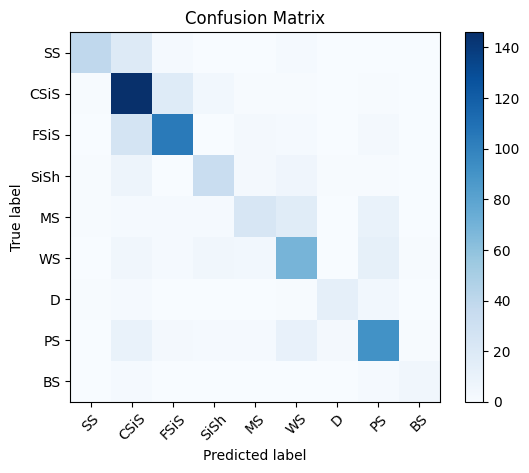

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


conf_RFC = confusion_matrix(y_test, yhat_RFC)

# Plot confusion matrix for Random Forest Classifier
plot_confusion_matrix(conf_RFC, facies_labels)

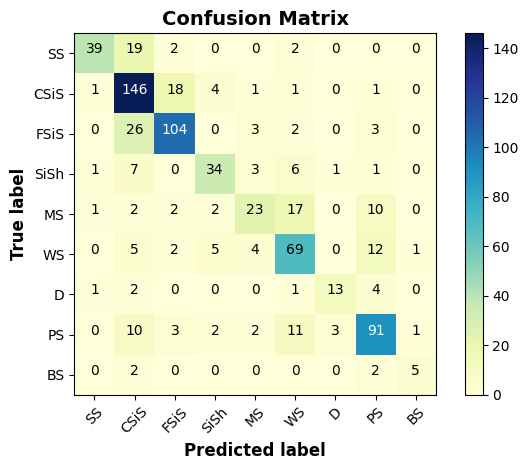

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.YlGnBu)
    plt.title('Confusion Matrix',fontsize=14,fontweight='bold')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'  # Formatting for annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=12,fontweight='bold')
    plt.xlabel('Predicted label',fontsize=12,fontweight='bold')
    plt.tight_layout()
    plt.show()


conf_RFC = confusion_matrix(y_test, yhat_RFC)

plot_confusion_matrix(conf_RFC, facies_labels)


In [26]:
jNNC = jaccard_score(y_test, yhat_NNC, average='weighted')
f1NNC =  f1_score(y_test, yhat_NNC, average='weighted')

print("NNC Jaccard index: %.3f" %jNNC)
print("NNC F1-score: %.3f" %f1NNC )

conf_NNC = confusion_matrix(y_test, yhat_NNC)
display_cm(conf_NNC, facies_labels, hide_zeros=True, display_metrics=True)

NNC Jaccard index: 0.543
NNC F1-score: 0.700
Confusion Matrix:
SS: [48  8  2  0  1  1  0  0  0]
CSiS: [ 10 143  31   2   2   3   1   2   1]
FSiS: [  1  26 123   0   0   5   0   1   0]
SiSh: [ 1  8  3 33  0  6  0  2  0]
MS: [ 0  3  4  2 28 11  2  6  0]
WS: [ 0  7  1  1 10 63  3 16  1]
D: [ 0  5  2  1  0  2 21  4  1]
PS: [ 1 10  3  0 14 12  1 94  0]
BS: [ 0  0  0  0  0  0  3  6 28]


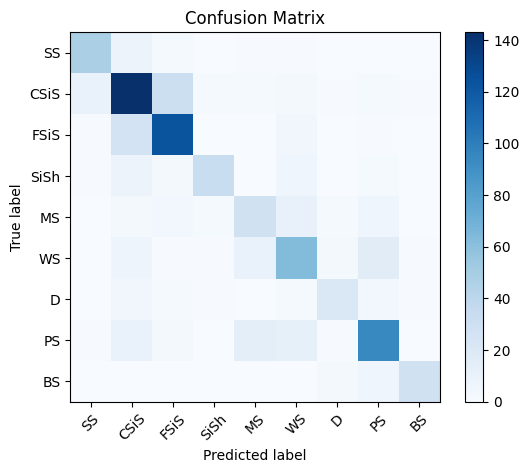

In [23]:
conf_NNC = confusion_matrix(y_test, yhat_NNC)
plot_confusion_matrix(conf_NNC, facies_labels)

In [24]:
jDT = jaccard_score(y_test, yhat_NNC, average='weighted')
f1DT = f1_score(y_test, yhat_DT, average='weighted')
print("DT Jaccard index: %.3f" % jDT )
print("DT F1-score: %.3f" % f1DT )

conf_DT = confusion_matrix(y_test, yhat_DT)
display_cm(conf_DT, facies_labels, hide_zeros=True, display_metrics=True)

DT Jaccard index: 0.543
DT F1-score: 0.626
Confusion Matrix:
SS: [39  9  8  0  2  0  0  2  0]
CSiS: [ 13 135  24   6   7   4   2   4   0]
FSiS: [  4  31 108   3   3   5   0   1   1]
SiSh: [ 2  5  4 34  1  5  0  2  0]
MS: [ 1  3  4  2 28  8  2  7  1]
WS: [ 1  5  1  3 18 49  1 23  1]
D: [ 0  4  1  1  1  3 12 11  3]
PS: [ 3  9  9  2 12 11  3 84  2]
BS: [ 0  0  0  0  0  2  3  0 32]


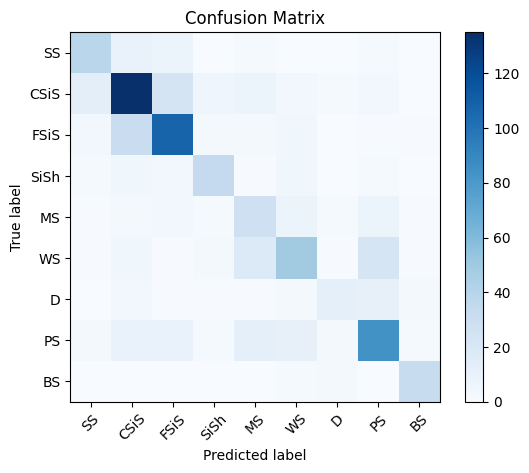

In [25]:
conf_DT = confusion_matrix(y_test, yhat_DT)

plot_confusion_matrix(conf_DT, facies_labels)

In [17]:
y_blind = blind['Facies'].values
blind_features = blind.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)
X_blind = scaler.transform(blind_features)

NameError: name 'blind' is not defined

In [ ]:
blind.to_csv('blind.csv')

In [ ]:
blind_features1 = blind[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M','RELPOS']]

blind_features1

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
2787,106.813,0.533,9.339,15.222,3.500,1,1.000
2788,100.938,0.542,8.857,15.313,3.416,1,0.977
2789,94.375,0.553,7.097,14.583,3.195,1,0.955
2790,89.813,0.554,7.081,14.110,2.963,1,0.932
2791,91.563,0.560,6.733,13.189,2.979,1,0.909
...,...,...,...,...,...,...,...
3197,70.750,0.936,2.249,8.249,4.062,2,0.536
3198,61.500,0.932,2.120,8.231,4.137,2,0.527
3199,56.813,0.926,1.909,8.248,4.105,2,0.518
3200,52.281,0.921,1.109,8.022,3.965,2,0.509


#### Predicting facies for blind well by all models

In [ ]:
#RFC
yhat_blind_RFC = RFC_model.predict(X_blind)
blind['RFC_Pred'] = yhat_blind_RFC

#NNC
yhat_blind_NNC = NNC_model.predict(X_blind)
blind['NNC_Pred'] = yhat_blind_NNC

#DT
yhat_blind_DT = DT_model.predict(X_blind)
blind['DT_Pred'] = yhat_blind_DT


C:\Users\Ritesh\AppData\Local\Temp\ipykernel_15680\662455110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blind['RFC_Pred'] = yhat_blind_RFC
C:\Users\Ritesh\AppData\Local\Temp\ipykernel_15680\662455110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blind['NNC_Pred'] = yhat_blind_NNC
C:\Users\Ritesh\AppData\Local\Temp\ipykernel_15680\662455110.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [ ]:
def compare_all_facies(logs, Pred, facies_colors):
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster_initial = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster = np.repeat(np.expand_dims(logs[Pred].values,1), 100, 1)

   
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(3, 6))

    im1 = ax[0].imshow(cluster_initial, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)

    im8 = ax[1].imshow(cluster, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
       
    
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="10%", pad=0.05)
    cbar=plt.colorbar(im8, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-8):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=2)
    
    ax[0].set_xlabel('Facies'); ax[1].set_xlabel(Pred)

    
    ax[0].set_yticklabels([]) ; ax[1].set_yticklabels([]) 
    
    ax[0].set_xticklabels([]); ax[1].set_xticklabels([]) 


    f.suptitle('Prediction in well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

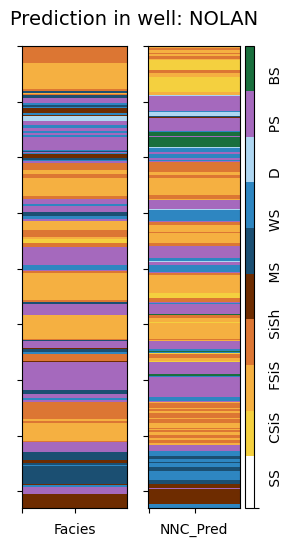

In [ ]:
compare_all_facies(blind,'NNC_Pred', facies_colors)